In [19]:
import s3fs
import nibabel as nib
import nibabel.processing
import pandas as pd 
import matplotlib.pyplot as plt 
from skimage.transform import rescale
from skimage.filters import gaussian
from nilearn import plotting 
import numpy as np

In [20]:
fs = s3fs.S3FileSystem(anon=True)

In [14]:
#ll = fs.ls('natural-scenes-dataset/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/betas_session0.nii.gz')
mask = fs.ls('natural-scenes-dataset/nsddata/ppdata/subj01/func1pt8mm/brainmask.nii.gz')

In [ ]:
#ll

In [21]:

#for fname in ll: 
    #fs.get(fname, "tmp.nii.gz")
    #img = nib.load("tmp.nii.gz")

    # XXX do something with one file
#fs.get(ll[0], "tmp.nii.gz")
#fs.get(mask[0], "brainmask.nii.gz")
img = nib.load("tmp.nii.gz")
#img_data = img.get_fdata()
beta_trial = img.slicer[:,:,:,1].get_fdata()/300 #get trial 1

#brainmask_img = nib.load("brainmask.nii.gz")
#brainmask = brainmask_img.get_fdata()
#header = img.header

#smooth
img_smoothed = gaussian(beta_trial, sigma=4)

#downsample 
#down_img = nibabel.processing.resample_to_output(img_data, voxel_sizes=(3,3,3))
img_rescaled = rescale(img_smoothed, 0.25, anti_aliasing=False)

#sigma = 8 #the higher the smoother, will smooth less when we have time, for now at 8 for neurohack presentation timeline 
#fhwm = nibabel.processing.sigma2fwhm(sigma) 
#smoothed_img = nibabel.processing.smooth_image(down_img, fhwm) 

#affine nibabel documentation 

    # Append into total results:
    # results.append(XXX)

In [ ]:
trials_info = pd.read_csv('../annotation_data/shared_trial_info.csv')
trials_sub1 = trials_info[((trials_info.SUBJECT == 1))]
trials_sub1.head()
len(trials_sub1)

In [ ]:
# 1.8 mm space functional data
# subj 1, session 1 
#trials = trials_sub1['trial_in_session'].tolist()
sessions = [1] #For veronica testing
#sessions = trials_sub1.SESSION.unique() #to loop over all sessions

#beta_trials = []
#np.asarray(beta_trials)
for session in sessions:
    if (session < 10):
        ll = fs.ls(f'natural-scenes-dataset/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/betas_session0{session}.nii.gz')
    else: 
        ll = fs.ls(f'natural-scenes-dataset/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/betas_session{session}.nii.gz')
    fs.get(ll[0], "tmp.nii.gz")   
    img = nib.load("tmp.nii.gz")
    trials_sub_ses = trials_sub1[(trials_sub1.SESSION == session)]
    
    #smooth 
    sigma = 8 #the higher the smoother, will smooth less when we have time, for now at 8 for neurohack presentation timeline 
    fhwm = nib.processing.sigma2fwhm(sigma) 
    smoothed_img = nib.processing.smooth_image(img, fhwm) 
    
    #downsample 
    nib.processing.resample_to_output(smoothed_img, voxel_sizes=(6,6,6),  
    
    #beta_trials = pd.DataFrame(columns = ["Betas", "Trial", "Session"])
    
    
    for count, t in enumerate(trials_sub_ses['trial_in_session'].tolist()):
        beta_trial = img.slicer[:,:,:,t].get_fdata()/300 #get trial 1
        #beta_trials = np.expand_dims(beta_trial,axis=3)
        

        #flatten 
        
        
        #add on trial and ses number 
        
        beta_trials.at[count,'Betas'] = beta_trial
        beta_trials.at[count,'Trial'] = t
    
    beta_trials["Session"] = session
    
    #save to csv 
    if (session == 1):
        beta_trials.to_csv('betas_sub1.csv', index=False)
    else:
        beta_trials.to_csv('betas_sub1.csv', index=False, mode="a")
            #beta_trial = beta_trial[:,:,:,np.newaxis]
            #beta_trial = beta_trial[:,:,:,t]
            #beta_trials = np.append(beta_trials, beta_trial,axis=3)
    

In [ ]:
print("session 1 beta, data shape:", beta_trials.shape)

In [ ]:
#beta_trials.to_csv('betas_sub1_ses1.csv', index=False)

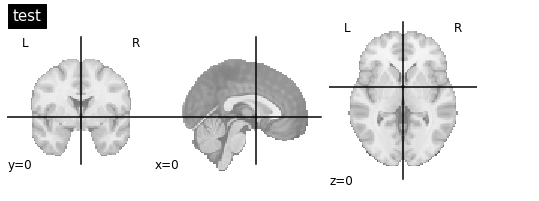

In [22]:
# overlay beta map with brain mask
plotting.plot_stat_map(nib.Nifti1Image(img_rescaled, img.affine), # this function needs a 3D data file
                       #bg_img=nib.Nifti1Image(brainmask, brainmask_img.affine), # load the brain mask as a background picture
                       cut_coords=(0, 0, 0), #use to select coordinates that you want to view
                       title="test",
                       vmax=5)